### Preparing dataframes for R

In [1]:
# Enabling R
%reload_ext rpy2.ipython

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
%%R
library(survival)

dfOri = read.table("tmp/RR.csv", header=T, sep=",")

In [3]:
%%R
# Dataset local copies
df = dfOri

estado_civil_lbl = c("Solteira", "Casada", "Viúva", "Separada/divorciada", "União estável")
escolaridade_lbl = c("Nenhuma", "1 a 3 anos", "4 a 7 anos", "8 a 11 anos", "12 ou mais")
raca_cor_lbl = c("Branca", "Preta", "Amarela", "Parda", "Indígena")
sexo_lbl = c("Masculino", "Feminino")
parto_lbl = c("Vaginal", "Cesário")
assistencia_nasc_lbl = c("Médico","Enfermeira","Parteira","Outros")
preenchimento_dnv_lbl = c("Médico","Enfermeiro","Parteira","Funcionário do cartório","Outros")

# Addind value labels
df$estado_civil <- factor(df$estado_civil, labels = estado_civil_lbl)
df$escolaridade <- factor(df$escolaridade, labels = escolaridade_lbl)
df$raca_cor <- factor(df$raca_cor, labels = raca_cor_lbl)
df$sexo <- factor(df$sexo, labels = sexo_lbl)
df$parto <- factor(df$parto, labels = parto_lbl)
df$assistencia_nasc <- factor(df$assistencia_nasc, labels = assistencia_nasc_lbl)
df$preenchimento_dnv <- factor(df$preenchimento_dnv, labels = preenchimento_dnv_lbl)

cat('Dimensões do Dataset (linhas x colunas):\n')
cat(dim(df))

cat('\n\nDistribuição entre as classes (0 - sobreviventes X 1 - mortes neonatais):\n')
cat(table(df$status))

Dimensões do Dataset (linhas x colunas):
96074 16

Distribuição entre as classes (0 - sobreviventes X 1 - mortes neonatais):
95515 559

In [4]:
%%R
sink(file("table/summary_R.txt", open="wt"),  split=TRUE)
print(summary(df))
sink()

       X              ano            ini            fim           tempo      
 Min.   :    0   Min.   :2006   Min.   :   0   Min.   :   4   Min.   : 0.00  
 1st Qu.:24018   1st Qu.:2008   1st Qu.:1078   1st Qu.:1107   1st Qu.:29.00  
 Median :48036   Median :2011   Median :2110   Median :2139   Median :29.00  
 Mean   :48036   Mean   :2011   Mean   :2070   Mean   :2099   Mean   :28.86  
 3rd Qu.:72055   3rd Qu.:2014   3rd Qu.:3081   3rd Qu.:3110   3rd Qu.:29.00  
 Max.   :96073   Max.   :2016   Max.   :3986   Max.   :4015   Max.   :29.00  
                                                                             
     status             idade                    estado_civil  
 Min.   :0.000000   Min.   :11.00   Solteira           :49237  
 1st Qu.:0.000000   1st Qu.:19.00   Casada             :27964  
 Median :0.000000   Median :24.00   Viúva              :  115  
 Mean   :0.005818   Mean   :24.53   Separada/divorciada:  441  
 3rd Qu.:0.000000   3rd Qu.:29.00   União estável      :

In [5]:
%%R
names(df)

 [1] "X"                  "ano"                "ini"               
 [4] "fim"                "tempo"              "status"            
 [7] "idade"              "estado_civil"       "escolaridade"      
[10] "raca_cor"           "sexo"               "parto"             
[13] "gestacoes"          "consultas_prenatal" "assistencia_nasc"  
[16] "preenchimento_dnv" 


### Kaplan-Meier funções de sobrevida e risco acumulado

In [6]:
%%R
# Kaplan-Meier
sink(file("table/km_fit.txt", open="wt"),  split=TRUE)
KM = survfit(Surv(tempo,status)~1, data=df)
print(KM)
sink()

Call: 
      n  events  median 0.95LCL 0.95UCL 
  96074     559      NA      NA      NA 


In [7]:
%%R
# Kaplan-Meier
sink(file("table/km_summary.txt", open="wt"),  split=TRUE)
print(summary(KM))
sink() 

Call: 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0  96074     163    0.998 0.000133        0.998        0.999
    1  95911      90    0.997 0.000165        0.997        0.998
    2  95821      61    0.997 0.000184        0.996        0.997
    3  95760      47    0.996 0.000197        0.996        0.997
    4  95713      29    0.996 0.000205        0.996        0.996
    5  95684      27    0.996 0.000212        0.995        0.996
    6  95657      15    0.996 0.000216        0.995        0.996
    7  95642      14    0.995 0.000219        0.995        0.996
    8  95628       9    0.995 0.000221        0.995        0.996
    9  95619       7    0.995 0.000223        0.995        0.996
   10  95612      10    0.995 0.000226        0.995        0.996
   11  95602       9    0.995 0.000228        0.995        0.995
   12  95593       7    0.995 0.000229        0.994        0.995
   13  95586       7    0.995 0.000231        0.994        0.995
   14  95579      

<a id='KM'></a>
### Função de Sobrevivência e Função de risco acumulado método estimador de Kaplan-Meier 

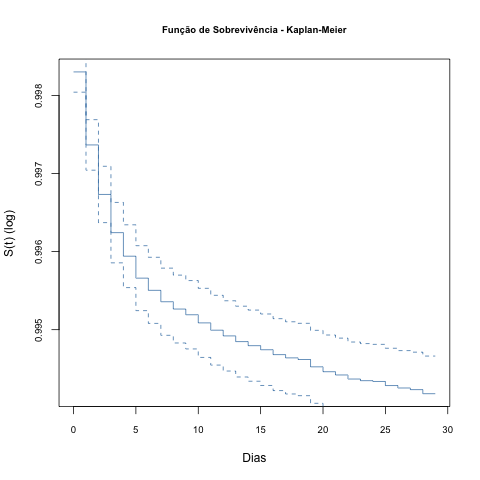

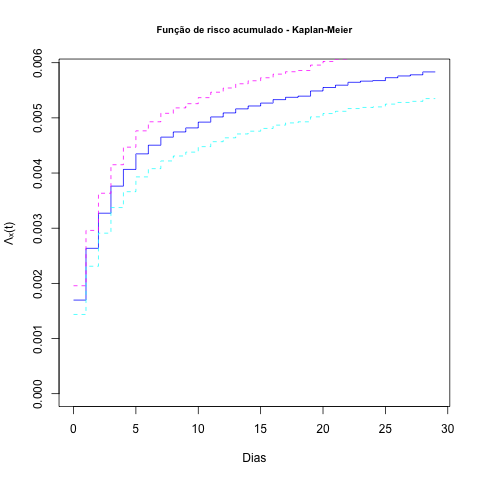

In [8]:
%%R
# Kaplan-Meier - funcao_sobrev_KM
png(file="img/funcao_sobrev_KM.png", width = 4, height = 4, units = 'in', res = 300)
plot(KM, conf.int=T, xlab="Dias", ylab="S(t) (log)", log='y',
     main="Função de Sobrevivência - Kaplan-Meier", cex.main=.8, cex.axis=.8,
     col="steelblue")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(KM, conf.int=T, xlab="Dias", ylab="S(t) (log)", log='y',
     main="Função de Sobrevivência - Kaplan-Meier", cex.main=.8, cex.axis=.8,
     col="steelblue")

# Kaplan-Meier - funcao_risco_acumulado_KM
png(file="img/funcao_risco_acumulado_KM.png",  width = 4, height = 4, units = 'in', res = 300)
plot(KM, col=c(4:6), conf.int=T, fun="cumhaz", 
     xlab="Dias", ylab="Λₓ(t)", main="Função de risco acumulado - Kaplan-Meier",
     cex.main=.8)
dev.off()

# REAPT TO SHOW (need to fix this)
plot(KM, col=c(4:6), conf.int=T, fun="cumhaz", 
     xlab="Dias", ylab="Λₓ(t)", main="Função de risco acumulado - Kaplan-Meier", 
     cex.main=.8)

### Kaplan-Meier (estratificado por sexo) funções de sobrevida e risco acumulado

In [9]:
315/559

0.5635062611806798

In [10]:
%%R
#Kaplan-Meier estratificado por sexo
sink(file("table/km_estrato_sexo.txt", open="wt"),  split=TRUE)
km_estrato_sexo = survfit(Surv(tempo,status) ~ sexo, conf.type="log", data=df)
print(km_estrato_sexo)
cat("\n")
print(summary(km_estrato_sexo))
cat("\n")

Call: 
                   n events median 0.95LCL 0.95UCL
sexo=Masculino 49504    315     NA      NA      NA
sexo=Feminino  46570    244     NA      NA      NA

Call: 
                sexo=Masculino 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0  49504      87    0.998 0.000188        0.998        0.999
    1  49417      49    0.997 0.000235        0.997        0.998
    2  49368      37    0.997 0.000265        0.996        0.997
    3  49331      20    0.996 0.000280        0.996        0.997
    4  49311      19    0.996 0.000293        0.995        0.996
    5  49292      20    0.995 0.000307        0.995        0.996
    6  49272       9    0.995 0.000313        0.995        0.996
    7  49263       7    0.995 0.000317        0.994        0.996
    8  49256       4    0.995 0.000320        0.994        0.996
    9  49252       4    0.995 0.000322        0.994        0.995
   10  49248       7    0.995 0.000327        0.994        0.995
   11  49241       7

<a id='KM_estrato_sexo'></a>
### S(t) estimada por Kaplan-Meier estratificado por sexo

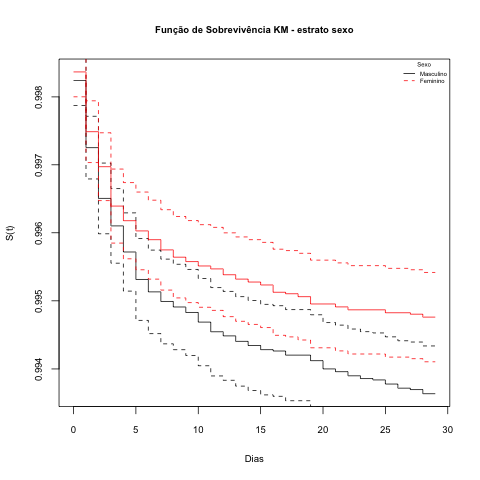

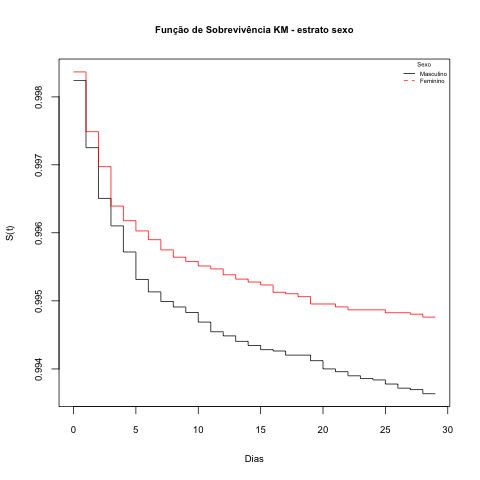

In [28]:
%%R
#Kaplan-Meier estratificado por sexo
png(file="img/funcao_sobrev_KM_estrato_sexo.png", width = 4, height = 4, units = 'in', res = 300)
plot(km_estrato_sexo, col=c(1:2), conf.int=T, xlab="Dias", ylab="S(t) (log)", log='y',  
     main="Função de Sobrevivência KM - estrato sexo", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=c("Masc", "Fem"), lty = c(1,2), col = 1:2, cex = 0.5,
        title="Sexo", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(km_estrato_sexo, col=c(1:2), conf.int=T, xlab="Dias", ylab="S(t)", log='y',
     main="Função de Sobrevivência KM - estrato sexo", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=sexo_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Sexo", bty="n")

#Kaplan-Meier estratificado por sexo
png(file="img/funcao_sobrev_KM_estrato_sexo_SEM.png", width = 4, height = 4, units = 'in', res = 300)
plot(km_estrato_sexo, col=c(1:2), conf.int=F, xlab="Dias", ylab="S(t) (log)", log='y',  
     main="Função de Sobrevivência KM - estrato sexo", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=c("Masc", "Fem"), lty = c(1,2), col = 1:2, cex = 0.5,
        title="Sexo", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(km_estrato_sexo, col=c(1:2), conf.int=F, xlab="Dias", ylab="S(t)", log='y',
     main="Função de Sobrevivência KM - estrato sexo", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=sexo_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Sexo", bty="n")

<a id='km_risco_strato_sexo'><a/>
### Função de risco acumulado por K-Meier estrat. por sexo

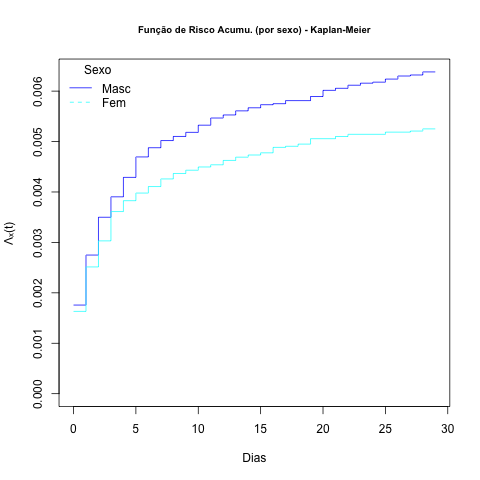

In [12]:
%%R
# Plot using the method 'cumulative hazard' to be used estimation of the survival curve 
png(file="img/funcao_risco_acumulado_KM_estrato_sexopng", width = 4, height = 4, units = 'in', res = 300)
plot(km_estrato_sexo, col=c(4:5), conf.int=F, fun="cumhaz",
     xlab="Dias", ylab="Λₓ(t)", main="Função de Risco Acumu. (por sexo) - Kaplan-Meier",
     cex.main=.8)
legend (x="topleft", legend=c("Masc", "Fem"), lty = c(1,2), col = 4:5,
        title="Sexo", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(km_estrato_sexo, col=c(4:5), conf.int=F, fun="cumhaz",
     xlab="Dias", ylab="Λₓ(t)", main="Função de Risco Acumu. (por sexo) - Kaplan-Meier",
     cex.main=.8)

legend (x="topleft", legend=c("Masc", "Fem"), lty = c(1,2), col = 4:5,
        title="Sexo", bty="n")

### Nelson-Aalen funções de sobrevida e risco acumulado

In [13]:
%%R
# Fit Nelson-Aalen
model_nelson_a = survfit(coxph(Surv(tempo, status) ~ 1, data = df))
print(model_nelson_a)

Call: 
      n  events  median 0.95LCL 0.95UCL 
  96074     559      NA      NA      NA 


In [14]:
%%R
# Fit Nelson-Aalen
sink(file("table/na_summary.txt", open="wt"),  split=TRUE)
print(summary(model_nelson_a))
sink()

Call: 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0  96074     163    0.998 0.000133        0.998        0.999
    1  95911      90    0.997 0.000165        0.997        0.998
    2  95821      61    0.997 0.000184        0.996        0.997
    3  95760      47    0.996 0.000197        0.996        0.997
    4  95713      29    0.996 0.000205        0.996        0.996
    5  95684      27    0.996 0.000212        0.995        0.996
    6  95657      15    0.996 0.000216        0.995        0.996
    7  95642      14    0.995 0.000219        0.995        0.996
    8  95628       9    0.995 0.000221        0.995        0.996
    9  95619       7    0.995 0.000223        0.995        0.996
   10  95612      10    0.995 0.000226        0.995        0.996
   11  95602       9    0.995 0.000228        0.995        0.995
   12  95593       7    0.995 0.000229        0.994        0.995
   13  95586       7    0.995 0.000231        0.994        0.995
   14  95579      

<a id='NA_Sobrevida'></a>
### Função de sobrevivencia por Nelson-Aalen

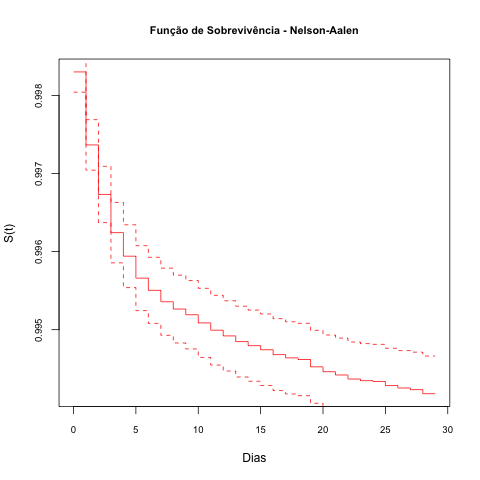

In [15]:
%%R
# funcao_sobrev_NA
png(file="img/funcao_sobrev_NA.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_nelson_a, conf.int=T,  xlab="Dias", ylab="S(t)", log='y',
     main="Função de Sobrevivência - Nelson-Aalen",col=2, cex.axis=.8, cex.main=.9)
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_nelson_a, conf.int=T,  xlab="Dias", ylab="S(t)", log='y',
     main="Função de Sobrevivência - Nelson-Aalen",col=2, cex.axis=.8, cex.main=.9)

<a id='NA_risco'></a>
### Função de risco acumulado por Nelson-Aalen

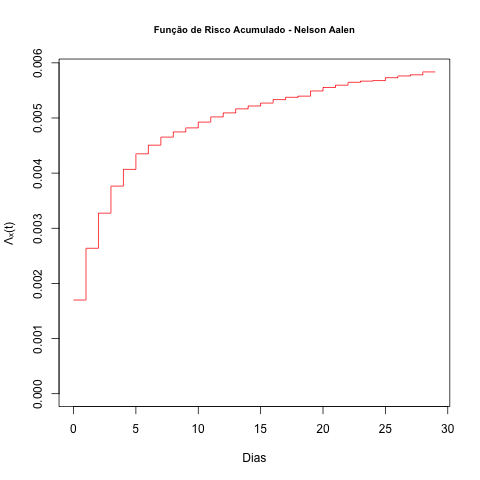

In [16]:
%%R
# funcao_risco_acumulado_nelson_aalen
png(file="img/funcao_risco_acumulado_nelson.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_nelson_a, conf.int=F, fun="cumhaz",
     xlab="Dias", ylab="Λₓ(t)",
     main="Função de Risco Acumulado - Nelson Aalen", col=2, cex.main=.8)
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_nelson_a, conf.int=F, fun="cumhaz",
     xlab="Dias", ylab="Λₓ(t)",
     main="Função de Risco Acumulado - Nelson Aalen", col=2, cex.main=.8)

<a id='km_estrato_esco'></a>
### S(t) estimada por Kaplan-Meier estratificado por escolaridade

In [17]:
%%R
# Kaplan-Meier estrato km_estrat_escolaridade
survfit(Surv(tempo,status) ~ escolaridade, conf.int=T, conf.type="log", data=df)


Call: 
                             n events median 0.95LCL 0.95UCL
escolaridade=Nenhuma      4718     50     NA      NA      NA
escolaridade=1 a 3 anos   5259     25     NA      NA      NA
escolaridade=4 a 7 anos  20856    111     NA      NA      NA
escolaridade=8 a 11 anos 52096    301     NA      NA      NA
escolaridade=12 ou mais  13145     72     NA      NA      NA


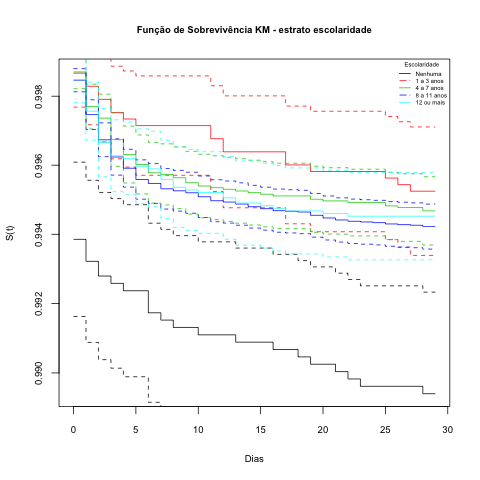

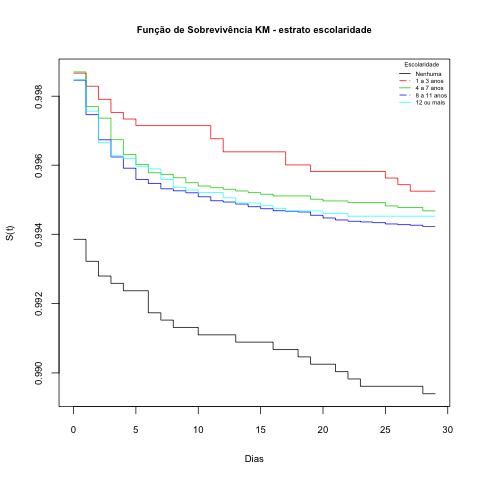

In [29]:
%%R
# Kaplan-Meier estrato km_estrat_escolaridade
sink(file("table/km_estrat_escolaridade.txt", open="wt"),  split=TRUE)
model_km_esc = survfit(Surv(tempo,status) ~ escolaridade, conf.int=T, conf.type="log", data=df)
sink()

png(file="img/funcao_sobrev_KM_estrato_escolaridade.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_km_esc, col=c(1:5), conf.int=T, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato escolaridade", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=escolaridade_lbl, lty = c(1,5), col = 1:5, cex = 0.5,
        title="Escolaridade", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_km_esc, col=c(1:5), conf.int=T, xlab="Dias", ylab="S(t)",  log='y', asp=2,
     main="Função de Sobrevivência KM - estrato escolaridade", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=escolaridade_lbl, lty = c(1,5), col = 1:5, cex = 0.5,
        title="Escolaridade", bty="n")



png(file="img/funcao_sobrev_KM_estrato_escolaridade_SEM.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_km_esc, col=c(1:5), conf.int=F, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato escolaridade", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=escolaridade_lbl, lty = c(1,5), col = 1:5, cex = 0.5,
        title="Escolaridade", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_km_esc, col=c(1:5), conf.int=F, xlab="Dias", ylab="S(t)",  log='y', asp=2,
     main="Função de Sobrevivência KM - estrato escolaridade", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=escolaridade_lbl, lty = c(1,5), col = 1:5, cex = 0.5,
        title="Escolaridade", bty="n")

<a id='km_estrato_raca_cor'><a/>
### Função de risco acumulado por K-Meier estratificado por raça/cor

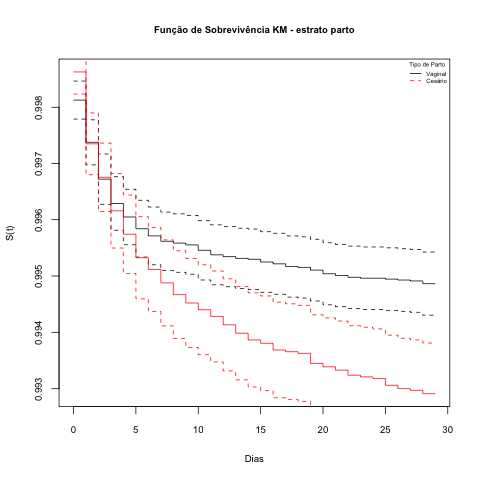

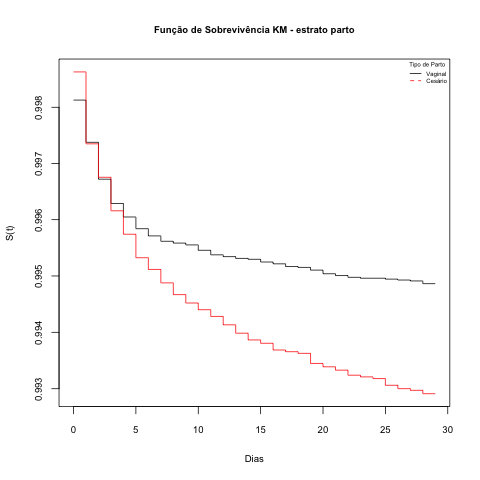

In [30]:
%%R
# Kaplan-Meier estrato raca_cor
sink(file("table/km_estrat_parto.txt", open="wt"),  split=TRUE)
model_km_parto = survfit(Surv(tempo,status) ~ parto, conf.type="log", data=df)
sink()

png(file="img/km_estrat_parto.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_km_parto, col=c(1:2), conf.int=T, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato parto", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=parto_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Tipo de Parto", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_km_parto, col=c(1:2), conf.int=T, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato parto", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=parto_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Tipo de Parto", bty="n")


png(file="img/km_estrat_parto_SEM.png", width = 4, height = 4, units = 'in', res = 300)
plot(model_km_parto, col=c(1:2), conf.int=F, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato parto", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=parto_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Tipo de Parto", bty="n")
dev.off()

# REAPT TO SHOW (need to fix this)
plot(model_km_parto, col=c(1:2), conf.int=F, xlab="Dias", ylab="S(t)",  log='y',
     main="Função de Sobrevivência KM - estrato parto", cex.axis=.8, cex.main=.8,  cex.lab=.8)
legend (x="topright", legend=parto_lbl, lty = c(1,2), col = 1:2, cex = 0.5,
        title="Tipo de Parto", bty="n")

### Log Rank e peto: parto, estado_civil, raca_cor, idade

### Log Rank por estado civil

In [26]:
%%R
sink(file("table/logrank_peto.txt", open="wt"),  split=TRUE)
  
cat('\n[sexo]\n')
cat('\nLog-Rank\n')
x = Surv(df$tempo,df$status)
print(survdiff(x~sexo, rho=0, data=df))
cat('\nPeto\n')
print(survdiff(x~sexo, rho=1, data=df))

cat('\n[parto]\n')
cat('\nLog-Rank\n')
x = Surv(df$tempo,df$status)
print(survdiff(x~parto, rho=0, data=df))
cat('\nPeto\n')
print(survdiff(x~parto, rho=1, data=df))

cat('\n[escolaridade]\n')
x = Surv(df$tempo,df$status)
cat('\nLog-Rank\n')
print(survdiff(x~escolaridade, rho=0, data=df))
cat('\nPeto\n')
print(survdiff(x~escolaridade, rho=1, data=df))

sink()


[sexo]

Log-Rank
Call:

                   N Observed Expected (O-E)^2/E (O-E)^2/V
sexo=Masculino 49504      315      288      2.53      5.23
sexo=Feminino  46570      244      271      2.69      5.23

 Chisq= 5.2  on 1 degrees of freedom, p= 0.02 

Peto
Call:

                   N Observed Expected (O-E)^2/E (O-E)^2/V
sexo=Masculino 49504      314      287      2.52      5.22
sexo=Feminino  46570      243      270      2.68      5.22

 Chisq= 5.2  on 1 degrees of freedom, p= 0.02 

[parto]

Log-Rank
Call:

                  N Observed Expected (O-E)^2/E (O-E)^2/V
parto=Vaginal 62497      321      364      5.01      14.3
parto=Cesário 33577      238      195      9.32      14.3

 Chisq= 14.3  on 1 degrees of freedom, p= 2e-04 

Peto
Call:

                  N Observed Expected (O-E)^2/E (O-E)^2/V
parto=Vaginal 62497      320      363      4.97      14.3
parto=Cesário 33577      237      195      9.25      14.3

 Chisq= 14.3  on 1 degrees of freedom, p= 2e-04 

[escolaridade]

Log-Rank